# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?
+ Is there a correlation between GDP and life expectancy of a country?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Import Python Modules

First import the preliminary modules that will be used in this project:

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from plotly.tools import FigureFactory as FF
%matplotlib inline

## Loading Data
To investigate the relationship between GDP and life expectancy, `all_data.csv` will be loaded as `df`.

In [135]:
df=pd.read_csv('all_data.csv')
display(df.head())

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Four columns are given:
`Country`: country name
`Year`: year of data
`Life expectancy at birth (years)`: The life expectancy
`GDP`: The number of gross domestic product

In [136]:
display(df.shape)

(96, 4)

There are 4 columns and 96 rows in total.

## Data Exploration

There are 6 nations' data included in this dataset

In [137]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


The year of this dataset ranged from 2000 to 2015

In [138]:
print((df.Year).unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The data types of each columns are as follows:

In [139]:
print(df.dtypes)

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


The summary statistics of each columns are as follows: 

In [140]:
print(df.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


### Data Cleaning
Changing the column name of `Life expectancy at birth (years)` to `LE`

In [141]:
df=df.rename({'Life expectancy at birth (years)':'LE'}, axis = 'columns')
print(df.columns)

Index(['Country', 'Year', 'LE', 'GDP'], dtype='object')


### Distribution Analysis
In the following section, we will be examined the distribution of `GDP` and `Life Expectancy`.

As we can see in the following plots, life expectancy and GDP have very opposite distributions. The distribution of life expectancy is very left skewed whereas GDP is extremely right skewed.

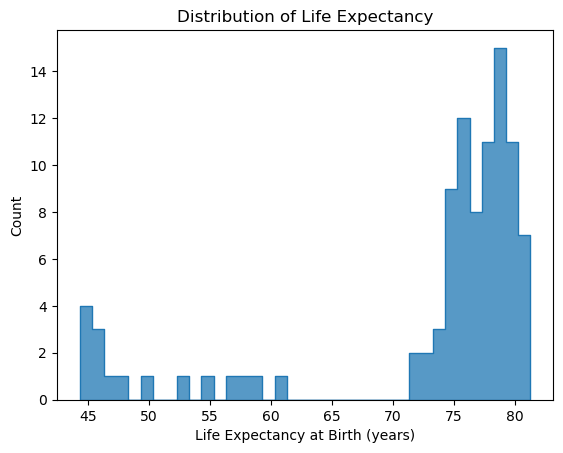

<Figure size 640x480 with 0 Axes>

In [142]:
sns.histplot(data=df, x='LE',binwidth=1,element='step')
plt.xlabel('Life Expectancy at Birth (years)')
plt.title('Distribution of Life Expectancy')
plt.show()
plt.clf()

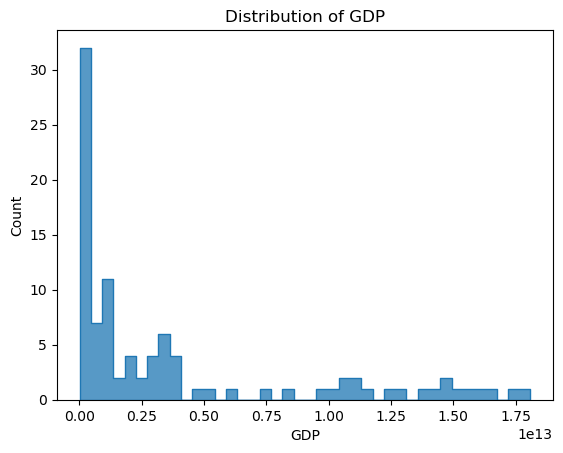

<Figure size 640x480 with 0 Axes>

In [143]:
sns.histplot(data=df, x='GDP',element='step',bins=40)
plt.xlabel('GDP')
plt.title('Distribution of GDP')
plt.show()
plt.clf()

The previous plots did not include countries and year of the data. Thus, we will investigate these parameters in the following sections.

### GDP and Life Expectancy by Year and Country

In [144]:
df_group = df.groupby('Country').agg({'GDP':['mean','first','last'],'LE':['mean','first','last']}).reset_index()
df_group.columns=['Country','GDP_mean','GDP_first_year','GDP_last_year','LE_mean','LE_first_year','LE_last_year']
df_group['GDP_growth']=(df_group.GDP_last_year-df_group.GDP_first_year)/df_group.GDP_first_year
df_group['LE_growth']=(df_group.LE_last_year-df_group.LE_first_year)/df_group.LE_first_year
display(df_group)

,Country,GDP_mean,GDP_first_year,GDP_last_year,LE_mean,LE_first_year,LE_last_year,GDP_growth,LE_growth
0,Chile,1.697888e+11,7.786093e+10,2.425180e+11,78.94375,77.3,80.5,2.114758,0.041397
1,China,4.957714e+12,1.211350e+12,1.106470e+13,74.26250,71.7,76.1,8.134189,0.061367
2,Germany,3.094776e+12,1.949950e+12,3.375610e+12,79.65625,78.0,81.0,0.731126,0.038462
3,Mexico,9.766506e+11,6.836480e+11,1.152260e+12,75.71875,74.8,76.7,0.685458,0.025401
4,United States of America,1.407500e+13,1.030000e+13,1.810000e+13,78.06250,76.8,79.3,0.757282,0.032552
5,Zimbabwe,9.062580e+09,6.689958e+09,1.630467e+10,50.09375,46.0,60.7,1.437186,0.319565


With this pivot table, we can see that USA has the highest GDP in average, and China has elevate their GDP the most. As for life expectancy, Germany has the highest in average and Zimbabwe improve it the most by 32%.

### Each Country's Change in GDP

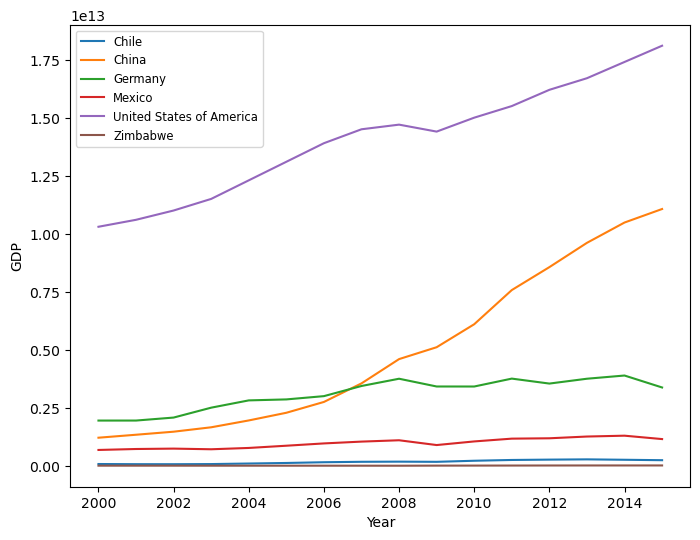

In [145]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='Year',y='GDP',hue='Country')
plt.legend(loc='upper left',fontsize='small')
plt.show()

The graphs below demonstrates each country's change in GDP seperately. We can see that apart from China, other countries all experienced a dip in GDP in late 2000's.

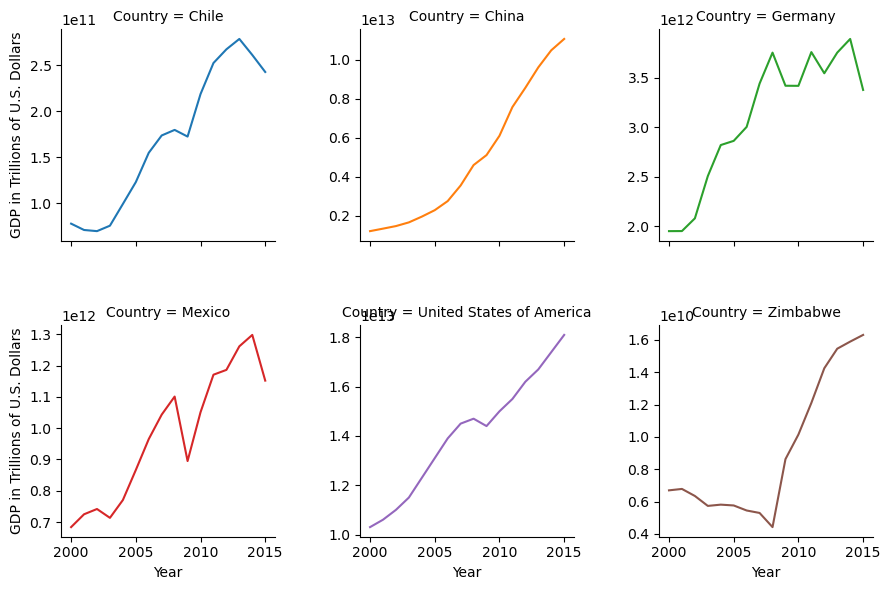

In [146]:
graph_gdp=sns.FacetGrid(df,col='Country',hue='Country',col_wrap=3,sharey=False)
graph_gdp=(graph_gdp.map(sns.lineplot,'Year','GDP')
                        .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))
plt.subplots_adjust(hspace=.4,wspace=.4)

### Each Country's Change in Life Expectancy

By looking at the graph below, we can tell that all country has increment in life expectancy from 2000 to 2015. Although Zimbabwe experienced a slight decrement in the early 2000s.

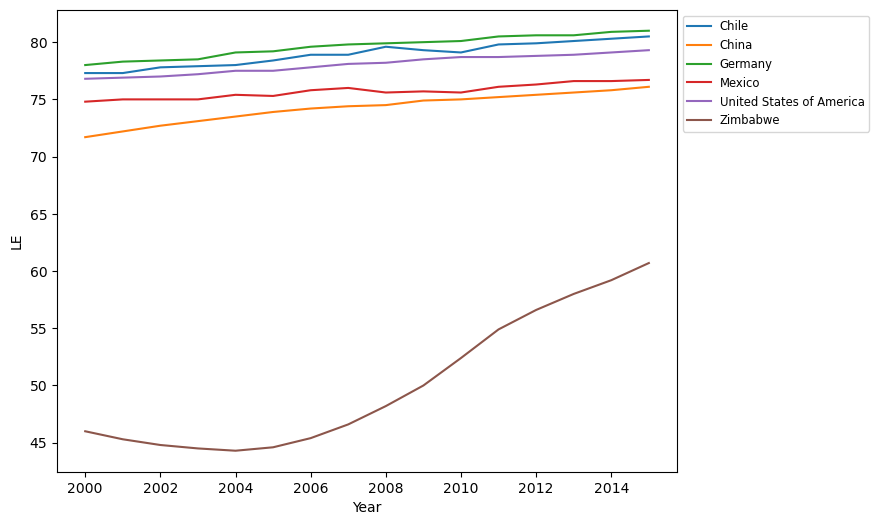

In [147]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='Year',y='LE',hue='Country')
plt.legend(bbox_to_anchor=(1,1),fontsize='small')
plt.show()

The graphs below demonstrates each country's change in life expectancy seperately. By looking at the trend we can found that despite the general trend is upward, both Chile and Mexico had moderate downfall in life expectancy at late 2000's.

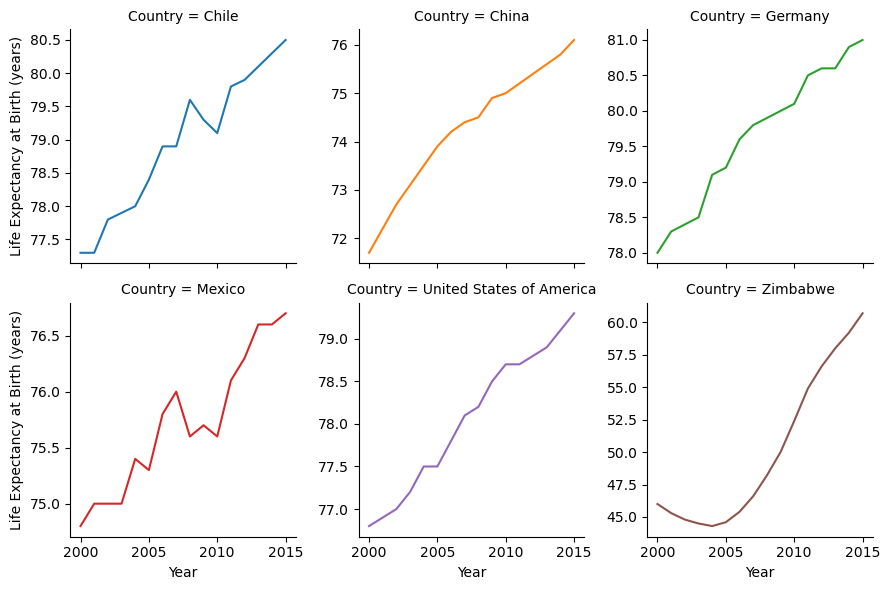

In [148]:
graph_LE=sns.FacetGrid(df,col='Country',hue='Country',col_wrap=3,sharey=False)
graph_LE=(graph_LE.map(sns.lineplot,'Year','LE')
          .set_axis_labels("Year","Life Expectancy at Birth (years)"))

### The Relationship between Life Expectancy and GDP

We can utilize scatterplot to understand the relationship between LE and GDP. Overall, it appears to have a positive relationship.

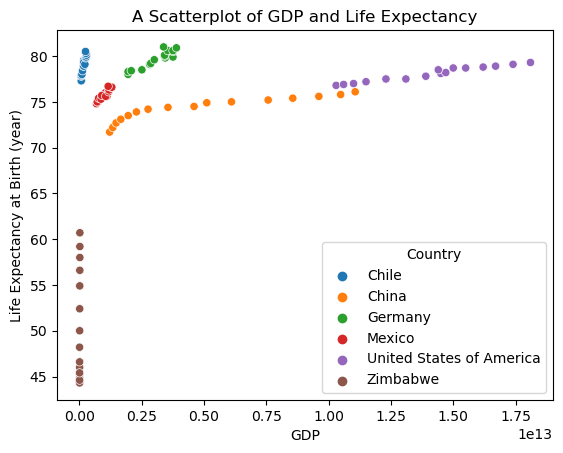

<Figure size 640x480 with 0 Axes>

In [149]:
sns.scatterplot(data=df, x='GDP', y='LE', hue='Country')
plt.title('A Scatterplot of GDP and Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy at Birth (year)')
plt.show()
plt.clf()

Since the slope are different among countries, it is better to plot it seperately. We can also examine the pearson correlation coefficient between each country's GDP and LE.

In [150]:
# using scipy.stats.pearsonr to calculate the Pearson correlation coefficient between GDP and LE and its significance level (p-value).
import scipy.stats as stats
corr = pd.DataFrame(columns=['country', 'r', 'p_value'])
for country in df.Country.unique():
    df_r=df[df.Country==country]
    r,p=stats.pearsonr(df_r.GDP,df_r.LE)
    corr = pd.concat([corr, pd.DataFrame({'country': [country], 'r': [r], 'p_value': [p]})], ignore_index=True)
corr['starsign']=''
corr.loc[corr['p_value']<0.05,'starsign']='*'
corr.loc[corr['p_value']<0.01,'starsign']='**'
display(corr)

,country,r,p_value,starsign
0,Chile,0.949877,1.865914e-08,**
1,China,0.908526,1.125099e-06,**
2,Germany,0.932699,1.401882e-07,**
3,Mexico,0.932238,1.468696e-07,**
4,United States of America,0.981709,1.749971e-11,**
5,Zimbabwe,0.966200,1.235852e-09,**


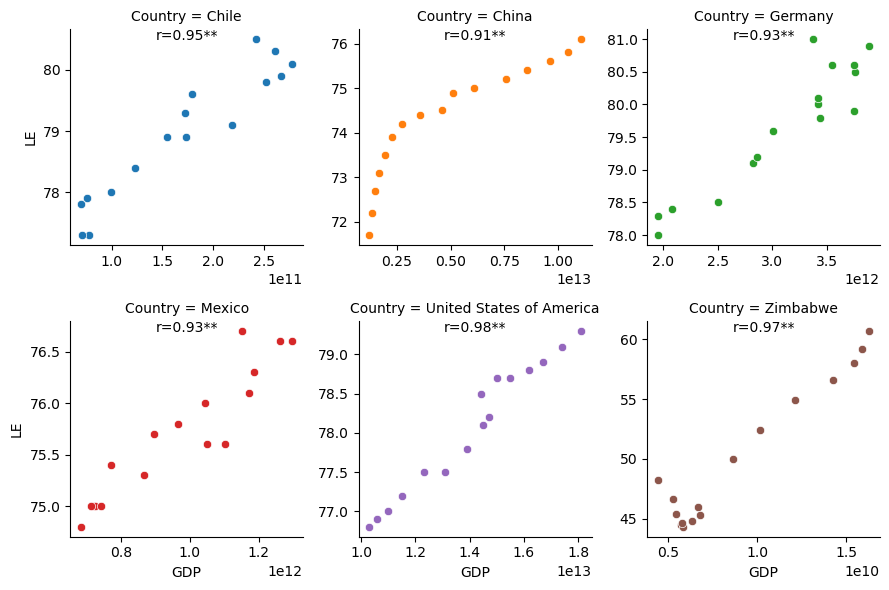

In [151]:
GDP_LE=sns.FacetGrid(df,col='Country',hue='Country',col_wrap=3,sharey=False,sharex=False)
GDP_LE=GDP_LE.map(sns.scatterplot,'GDP','LE')
for ax, country in zip(GDP_LE.axes.flat, df['Country'].unique()):
    r_value = corr[corr['country'] == country]['r'].iloc[0]
    star=corr[corr['country'] == country]['starsign'].iloc[0]
    ax.annotate(f"r={round(r_value, 2)}{star}", xy=(0.5, 0.95), xycoords='axes fraction', ha='center')

As we can observe from the plots, all countries demonstrate a positive relationship between GDP and life expectancy, with USA having the highest correlation coefficient and China the least.

## Conclusion
This project was able to generate numbers of data visualization with limited data (4x96).
We are able to answer the questions we had in the beginning:
+ Has life expectancy increased over time in the six nations?
    - Yes, all nations experienced increase in life expectancy from 2000 to 2015, with Zimbabwe the most.
    - Chile and Mexico both had a significant drop at late 2000's.
+ Has GDP increased over time in the six nations?
    - Yes, all nations experienced increase in GDP, with China the most.
    - Only China remain constant upward in GDP from 2000 to 2015.
+ What is the average life expectancy in these nations?
    - With most of the nations ranged from 75 to 80, except Zimbabwe which has only about 50.
+ What is the distribution of that life expectancy?
    - The distribition of life expectancy is left skewed.
+ Is there a correlation between GDP and life expectancy of a country?
    - We observed highly positive correlation between life expectancy and GDP, with USA demonstrated the highest correlation.

## Future Research
We can further investigate on factors that might influece GDP to understand what cause the dip in GDP at late 2000s. Perhaps the production of industries and inflation rate.